# Task 1: Student Score Prediction

## Description
Build a regression model to predict student exam scores using the **Student Performance Factors** dataset.  
Steps include:
- Data cleaning & visualization
- Splitting into train/test sets
- Training a linear regression model
- Evaluating & visualizing predictions
- Bonus: Trying polynomial regression & feature combinations

### Step 1: Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Step 2: Loading Dataset

In [13]:
df = pd.read_csv("StudentPerformanceFactors.csv")

# Preview dataset
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Step 3: Data Cleaning

In [14]:
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

df = df[['Hours_Studied', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']]
df = df.dropna()

# Info & summary
df.info()
df.describe()

Dataset shape: (6607, 20)

Missing values:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Hours_Studied    6607 non-null   int64
 1   Sleep_Hours      6607 non-null   int64
 

,Hours_Studied,Sleep_Hours,Previous_Scores,Exam_Score
count,6607.000000,6607.00000,6607.000000,6607.000000
mean,19.975329,7.02906,75.070531,67.235659
std,5.990594,1.46812,14.399784,3.890456
min,1.000000,4.00000,50.000000,55.000000
25%,16.000000,6.00000,63.000000,65.000000
50%,20.000000,7.00000,75.000000,67.000000
75%,24.000000,8.00000,88.000000,69.000000
max,44.000000,10.00000,100.000000,101.000000


### Step 4: Basic Visualization

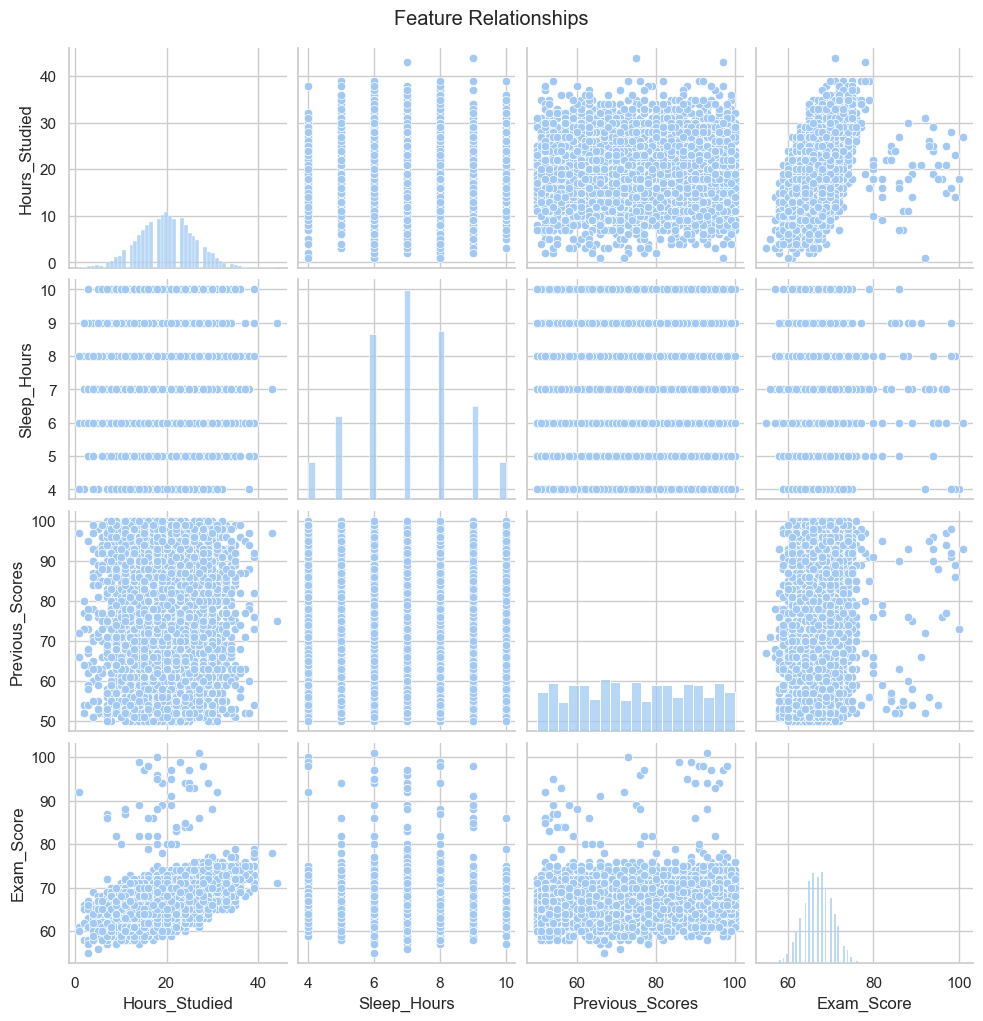

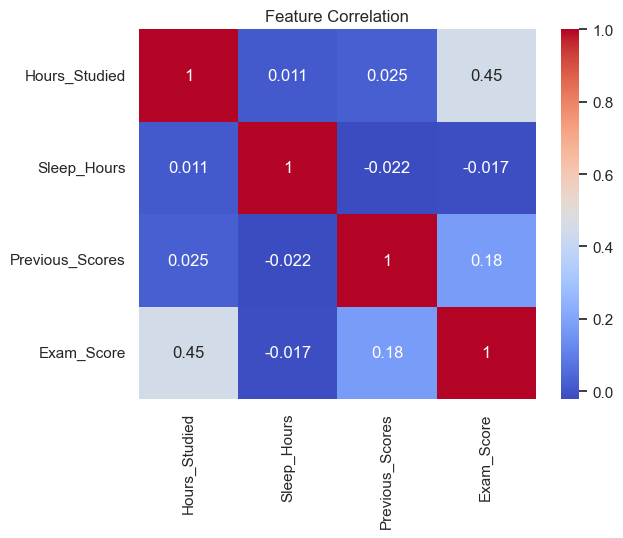

In [15]:
sns.pairplot(df)
plt.suptitle("Feature Relationships", y=1.02)
plt.show()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

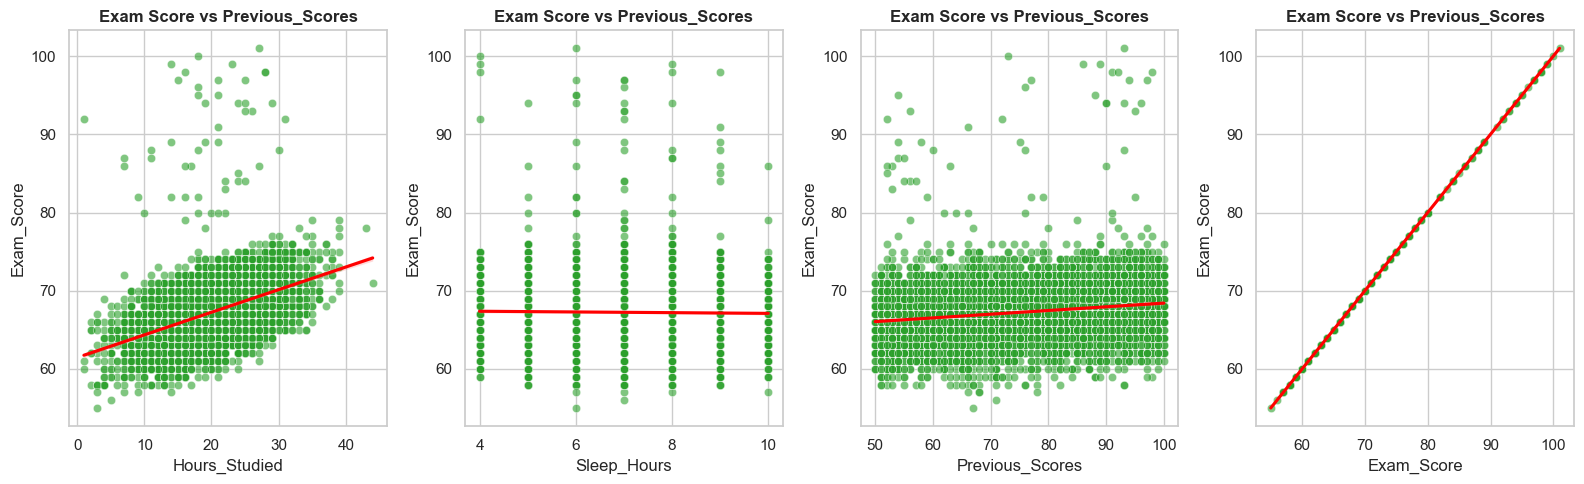

In [5]:
top_features = ['Hours_Studied', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']
plt.figure(figsize=(16,5))
for i, col in enumerate(top_features, 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(x=col, y="Exam_Score", data=df, alpha=0.6, color="#2ca02c")
    sns.regplot(x=col, y="Exam_Score", data=df, scatter=False, color="red")
    plt.title(f"Exam Score vs Previous_Scores", fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

### Step 5: Feature Selection

In [6]:
# Using "Hours_Studied" to predict "Exam_Score"
X = df[['Hours_Studied']]   # independent variable
y = df['Exam_Score']      # target variable

### Step 6: Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 5285
Testing samples: 1322


### Step 7: Train Linear Regression Model

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

### Step 8: Model Evaluation

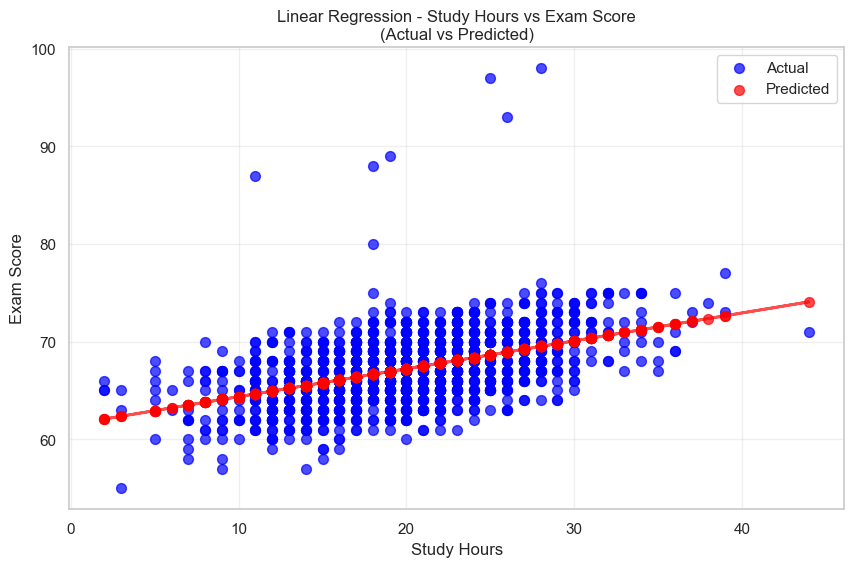

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color="blue", label="Actual", alpha=0.7, s=50)
plt.scatter(X_test, y_pred, color="red", label="Predicted", alpha=0.7, s=50)
plt.plot(X_test, y_pred, color="red", linewidth=2, alpha=0.7)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Linear Regression - Study Hours vs Exam Score\n(Actual vs Predicted)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Step 9: Polynomial Regression

Polynomial Regression R²: 0.23276034442853466


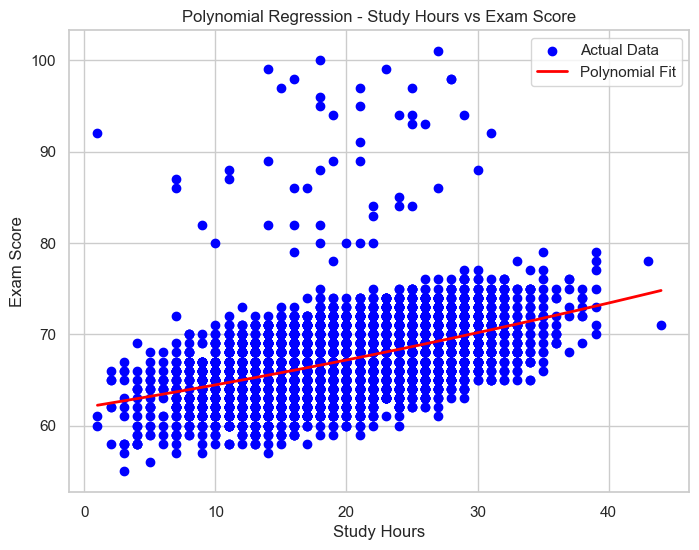

In [19]:
poly = PolynomialFeatures(degree=2)  # Try degree=3 for higher complexity
X_poly = poly.fit_transform(X)

# Train-test split for polynomial
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_reg = LinearRegression()
poly_reg.fit(Xp_train, yp_train)

yp_pred = poly_reg.predict(Xp_test)

print("Polynomial Regression R²:", r2_score(yp_test, yp_pred))

# Plot polynomial curve
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
X_seq_poly = poly.fit_transform(X_seq)  # Use fit_transform instead of transform to avoid feature names issue
y_seq = poly_reg.predict(X_seq_poly)

plt.figure(figsize=(8,6))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X_seq, y_seq, color="red", linewidth=2, label="Polynomial Fit")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Polynomial Regression - Study Hours vs Exam Score")
plt.legend()
plt.show()